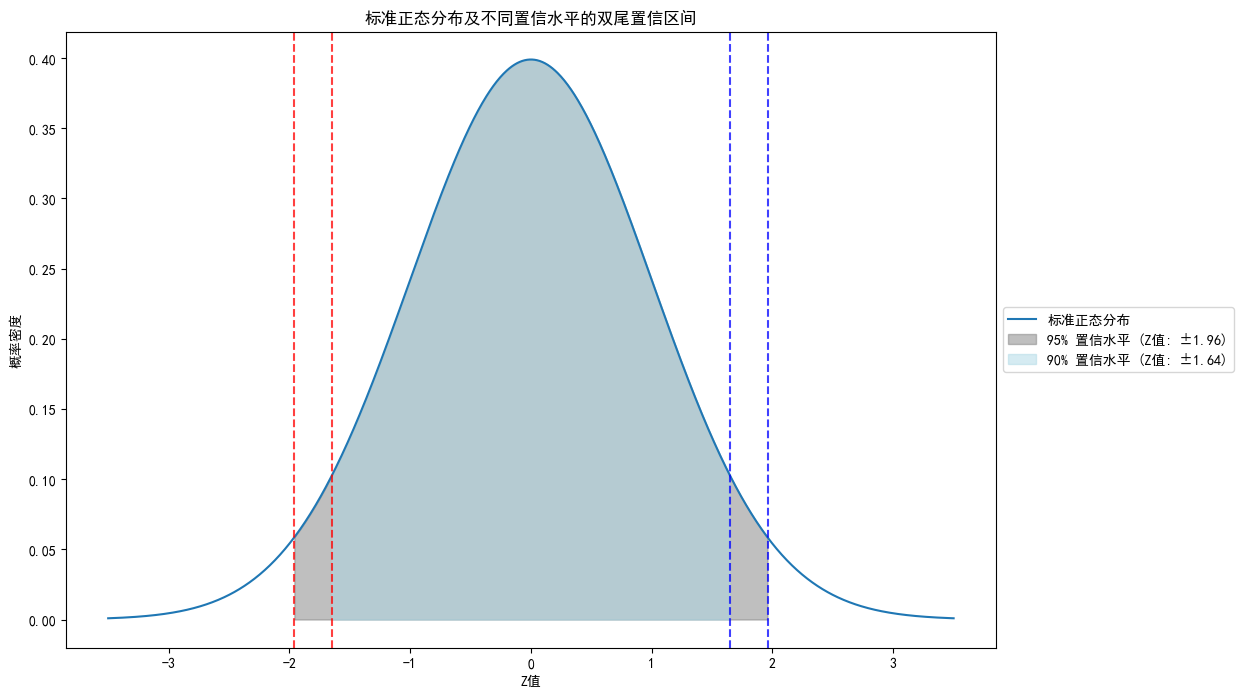

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl

# 设置matplotlib支持中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 定义两个信度水平和相关z值计算
confidence_levels = [0.95, 0.90]
z_values = [norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]

# 生成标准正态分布的数据
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x)

# 绘制标准正态分布图
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='标准正态分布')

# 为每个信度水平绘制置信区间和临界值
colors = ['gray', 'lightblue']  # 不同信度水平的颜色
labels = ['95% 置信水平', '90% 置信水平']

for i, z in enumerate(z_values):
    plt.fill_between(x, y, where=(x > -z) & (x < z), color=colors[i], alpha=0.5,
                     label=f'{labels[i]} (Z值: ±{z:.2f})')
    plt.axvline(x=-z, color='r', linestyle='--', alpha=0.75)
    plt.axvline(x=z, color='b', linestyle='--', alpha=0.75)

# 添加图例，放在图外的右侧
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 设置标题和标签
plt.title('标准正态分布及不同置信水平的双尾置信区间')
plt.xlabel('Z值')
plt.ylabel('概率密度')

# 显示图表
plt.show()


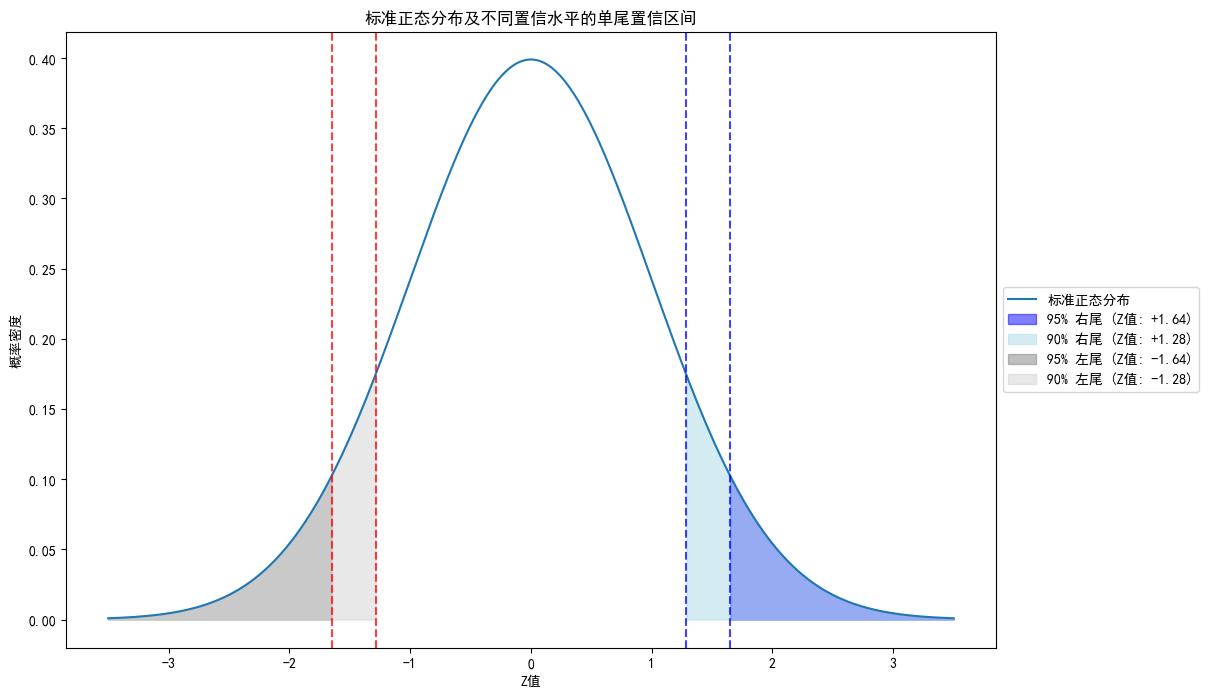

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl

# 设置matplotlib支持中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 定义两个信度水平和相关z值计算
confidence_levels = [0.95, 0.90]
z_values = [norm.ppf(cl) for cl in confidence_levels]  # 单尾z值

# 生成标准正态分布的数据
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x)

# 绘制标准正态分布图
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='标准正态分布')

# 为每个信度水平绘制置信区间和临界值
colors_right = ['blue', 'lightblue']  # 右尾的颜色
colors_left = ['gray', 'lightgray']   # 左尾的颜色
labels_right = ['95% 右尾', '90% 右尾']
labels_left = ['95% 左尾', '90% 左尾']

# 右尾部分
for i, z in enumerate(z_values):
    plt.fill_between(x, y, where=x > z, color=colors_right[i], alpha=0.5,
                     label=f'{labels_right[i]} (Z值: +{z:.2f})')
    plt.axvline(x=z, color='b', linestyle='--', alpha=0.75)

# 左尾部分
for i, z in enumerate(z_values):
    plt.fill_between(x, y, where=x < -z, color=colors_left[i], alpha=0.5,
                     label=f'{labels_left[i]} (Z值: -{z:.2f})')
    plt.axvline(x=-z, color='r', linestyle='--', alpha=0.75)

# 添加图例，放在图外的右侧
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 设置标题和标签
plt.title('标准正态分布及不同置信水平的单尾置信区间')
plt.xlabel('Z值')
plt.ylabel('概率密度')

# 显示图表
plt.show()


In [3]:
import numpy as np
from scipy.stats import norm

def calculate_sample_size(p, Z, E):
    """计算所需的样本大小"""
    n = (Z**2 * p * (1 - p)) / (E**2)
    return int(np.ceil(n))

def calculate_threshold(p, Z, n, direction='reject'):
    """计算拒收或接收的阈值"""
    SE = np.sqrt(p * (1 - p) / n)
    if direction == 'reject':
        return p + Z * SE
    else:
        return p - Z * SE

# 标称次品率、误差界限
p = 0.10
E = 0.03  # 1%的误差界限

# 拒收方案的参数
Z_reject = norm.ppf(0.95)  # 单尾，95%置信水平
n_reject = calculate_sample_size(p, Z_reject, E)
reject_threshold = calculate_threshold(p, Z_reject, n_reject, 'reject')

# 接收方案的参数
Z_accept = norm.ppf(0.90)  # 单尾，90%置信水平
n_accept = calculate_sample_size(p, Z_accept, E)
accept_threshold = calculate_threshold(p, Z_accept, n_accept, 'accept')

print(f"拒收方案：样本大小 = {n_reject}, 拒收阈值 = {reject_threshold:.3f}")
print(f"接收方案：样本大小 = {n_accept}, 接收阈值 = {accept_threshold:.3f}")


拒收方案：样本大小 = 271, 拒收阈值 = 0.130
接收方案：样本大小 = 165, 接收阈值 = 0.070


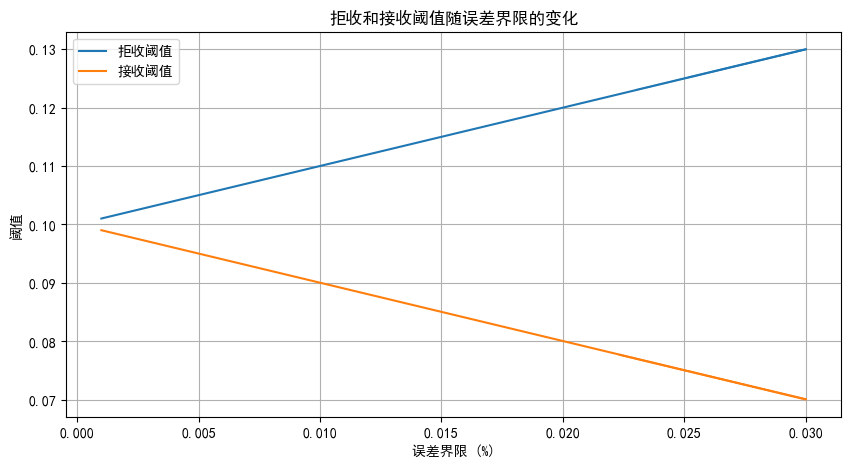

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# 设置matplotlib支持中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
# Function to calculate sample size based on confidence interval and margin of error
def calculate_sample_size(p, Z, E):
    n = (Z**2 * p * (1 - p)) / (E**2)
    return int(np.ceil(n))

# Function to calculate acceptance and rejection thresholds
def calculate_threshold(p, Z, n, direction='reject'):
    SE = np.sqrt(p * (1 - p) / n)
    if direction == 'reject':
        return p + Z * SE
    else:
        return p - Z * SE

# Defining parameters
p = 0.10
error_margin = np.linspace(0.001, 0.03, 10000)  # Error margin from 1% to 5%

# Calculating thresholds for reject and accept scenarios at different error margins
reject_thresholds = []
accept_thresholds = []

Z_reject = norm.ppf(0.95)  # Single tail for 95% confidence
Z_accept = norm.ppf(0.90)  # Single tail for 90% confidence

for E in error_margin:
    n_reject = calculate_sample_size(p, Z_reject, E)
    n_accept = calculate_sample_size(p, Z_accept, E)
    reject_thresholds.append(calculate_threshold(p, Z_reject, n_reject, 'reject'))
    accept_thresholds.append(calculate_threshold(p, Z_accept, n_accept, 'accept'))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(error_margin, reject_thresholds, label='拒收阈值')
plt.plot(error_margin, accept_thresholds, label='接收阈值')
plt.xlabel('误差界限 (%)')
plt.ylabel('阈值')
plt.title('拒收和接收阈值随误差界限的变化')
plt.legend()
plt.grid(True)
plt.show()
